# Scikit Learn Practice - Machine Learning
Source: https://www.youtube.com/watch?v=0B5eIE_1vpU 


## A quick sklearn model training and prediciton API

In [23]:
import numpy as np 
from sklearn.datasets import fetch_california_housing

In [24]:
california_housing = fetch_california_housing()
X = np.array(california_housing['data'])
y = np.array(california_housing['target'])
feature_names = np.array(california_housing['feature_names'])
target_name = np.array(california_housing['target_names'])
print("feature_names", feature_names)
print("target_name", target_name)

feature_names ['MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude']
target_name ['MedHouseVal']


In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [26]:
def pred_model(model, X, y):
    model.fit(X, y)
    pred = model.predict(X)
    plt.scatter(y, pred)
    plt.xlabel('actual')
    plt.ylabel('prediction')
    plt.show()

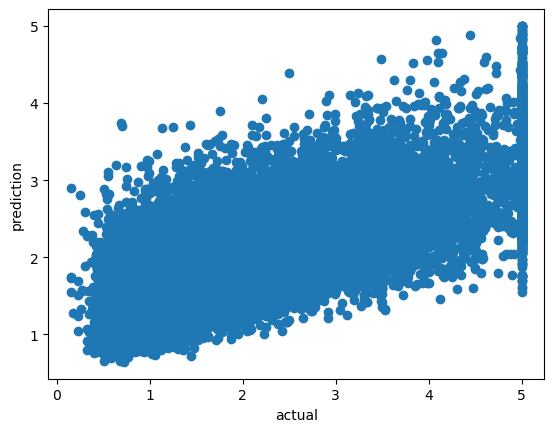

In [27]:
pred_model(KNeighborsRegressor(), X, y)

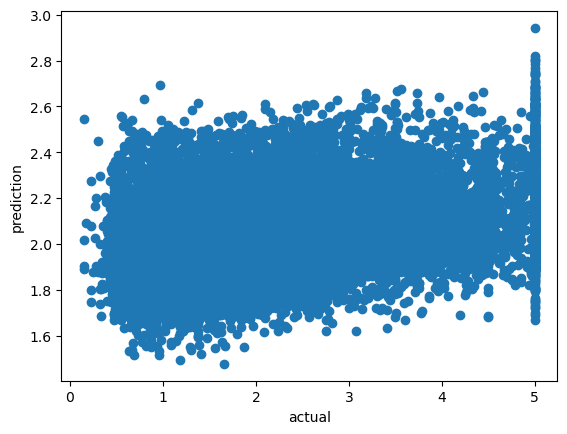

In [28]:
pred_model(KNeighborsRegressor(n_neighbors=100), X, y)

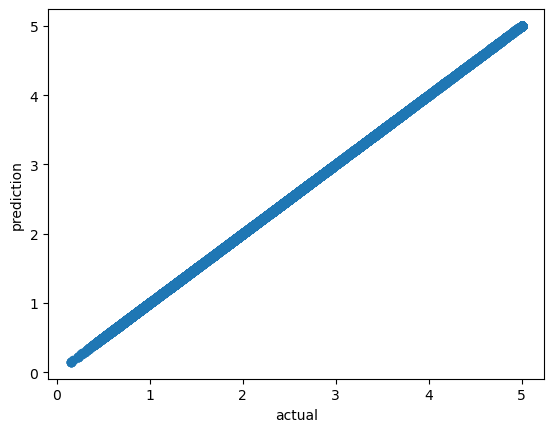

In [29]:
# the model predict itself by training itself each data point as neigbor.
pred_model(KNeighborsRegressor(n_neighbors=1), X, y)

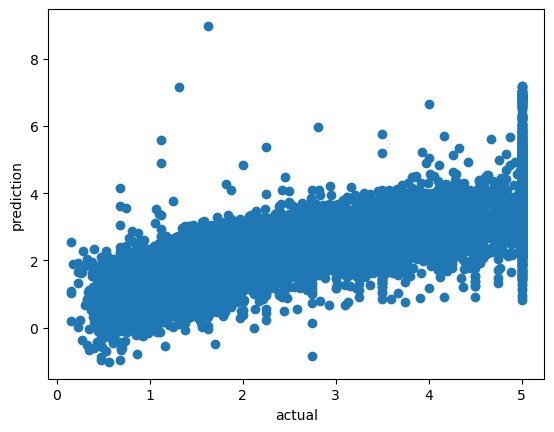

In [30]:
pred_model(LinearRegression(), X, y)   

## Sklearn Pipeline

In [31]:
# model 
from sklearn.neighbors import KNeighborsRegressor
# ML process
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
# plot
import matplotlib.pyplot as plt 

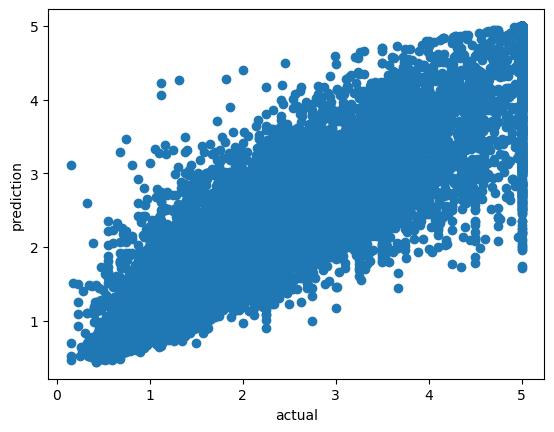

In [32]:
model = KNeighborsRegressor()

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', model)
])

pred_model(pipe, X, y)

## Hyperparameter tuning

In [33]:
# model 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
# ML processing
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
# plot
import matplotlib.pylab as plt 
# data
import pandas as pd 
import numpy as np 

In [34]:
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=5))
])

pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

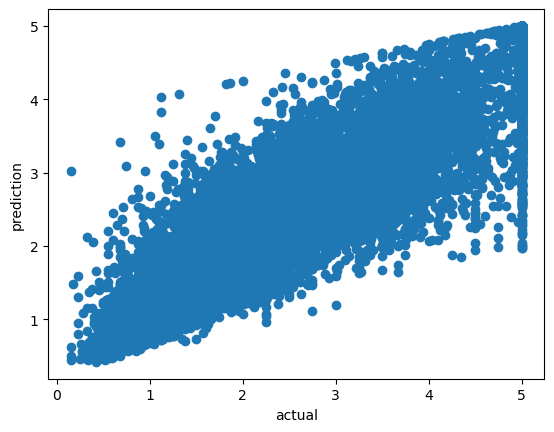

In [35]:
param_grid = {
    'model__n_neighbors': [v for v in range(2, 5)],
    'model__algorithm': ['auto', 'ball_tree']
}

model = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
)

pred_model(model, X, y)

In [36]:
model.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=4))])

In [37]:
pd.DataFrame(model.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__algorithm,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,0.008337,0.000166,0.369826,0.034781,auto,4,"{'model__algorithm': 'auto', 'model__n_neighbo...",0.540323,0.564974,0.499827,0.535041,0.026857,1
5,0.012038,0.000316,1.092773,0.110845,ball_tree,4,"{'model__algorithm': 'ball_tree', 'model__n_ne...",0.540323,0.564974,0.499827,0.535041,0.026857,1
1,0.008434,0.000216,0.346496,0.025277,auto,3,"{'model__algorithm': 'auto', 'model__n_neighbo...",0.518547,0.543340,0.473595,0.511827,0.028867,3
4,0.007819,0.000051,0.831624,0.080949,ball_tree,3,"{'model__algorithm': 'ball_tree', 'model__n_ne...",0.518547,0.543340,0.473595,0.511827,0.028867,3
0,0.011881,0.004308,0.354168,0.020609,auto,2,"{'model__algorithm': 'auto', 'model__n_neighbo...",0.468788,0.503457,0.424388,0.465544,0.032361,5


## Data preprocessing

### Standard Scale and  Quantile Scale

In [38]:
# data
import numpy as np 
import pandas as pd
# plot
import matplotlib.pyplot as plt 
# ML processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer, RobustScaler

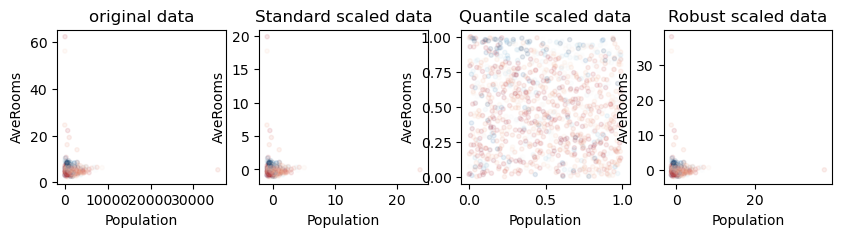

In [39]:
def std_scale(arr):
    return (arr - np.mean(arr)) / np.std(arr)
    
select_feaures = [4, 2]
x1_name, x2_name = feature_names[select_feaures]

# original data
np.random.RandomState(123)
samples = np.random.choice(X.shape[0], size=1000, replace=False)
x1 = X[samples, select_feaures[0]].reshape(-1, 1)
x2 = X[samples, select_feaures[1]].reshape(-1, 1)
y_sample = y[samples]
# standard scale <= no change in shapei
x1_scale, x2_scale = std_scale(x1), std_scale(x2)
# scale and reshape
X_qt = QuantileTransformer(n_quantiles=100).fit_transform(X[samples, :])
x1_qt_scale = X_qt[:, select_feaures[0]]
x2_qt_scale = X_qt[:, select_feaures[1]]
# robust scale method 
X_robust = RobustScaler(
    with_centering=True, with_scaling= True,
    ).fit_transform(X[samples, :])
x1_robust_scale = X_robust[:, select_feaures[0]]
x2_robust_scale = X_robust[:, select_feaures[1]]


fig, (ax1, ax2, ax3, ax4) = plt.subplots(
    nrows=1, ncols=4, figsize=(10, 2))
ax1.scatter(x1, x2, alpha=0.1, marker='.', c=y_sample, cmap='RdBu')
ax1.set_xlabel(x1_name)
ax1.set_ylabel(x2_name)
ax1.set_title("original data")

ax2.scatter(x1_scale, x2_scale, alpha=0.1, marker='.', c=y_sample, cmap='RdBu')
ax2.set_xlabel(x1_name)
ax2.set_ylabel(x2_name)
ax2.set_title("Standard scaled data")

ax3.scatter(x1_qt_scale, x2_qt_scale, alpha=0.1, marker='.', c=y_sample, cmap='RdBu')
ax3.set_xlabel(x1_name)
ax3.set_ylabel(x2_name)
ax3.set_title("Quantile scaled data")

ax4.scatter(x1_robust_scale, x2_robust_scale, alpha=0.1, marker='.', c=y_sample, cmap='RdBu')
ax4.set_xlabel(x1_name)
ax4.set_ylabel(x2_name)
ax4.set_title("Robust scaled data")

plt.show()


In [40]:
def plot_output(scaler, model):
    pipe = Pipeline([
        ('scale', scaler),
        ('mode', model)
    ])
    pipe.fit(X, y)
    
    plt.figure(figsize=(9, 3))
    plt.subplot(131)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.title('original data')
    X_scale = scaler.transform(X)
    plt.subplot(132)
    plt.scatter(X_scale[:, 0], X_scale[:, 1], c=y)
    plt.title('Scaled data')
    plt.subplot(133)
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_new = np.random.uniform(X_min, X_max, X.shape)
    y_pred = pipe.predict(X_new)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=y_pred)
    plt.title('Predicted data')
    plt.show()
    return pipe    

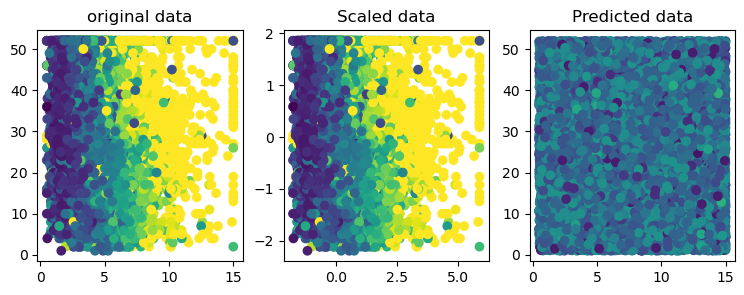

Pipeline(steps=[('scale', StandardScaler()), ('mode', KNeighborsRegressor())])

In [41]:
X = np.array(california_housing['data'])
y = np.array(california_housing['target'])

plot_output(
    StandardScaler(),
    KNeighborsRegressor(n_neighbors=5)) 


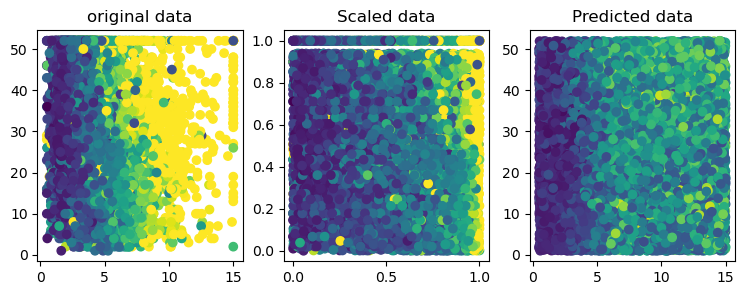

Pipeline(steps=[('scale', QuantileTransformer()),
                ('mode', KNeighborsRegressor(n_neighbors=10))])

In [42]:
plot_output(
    QuantileTransformer(),
    KNeighborsRegressor(n_neighbors=10)) 

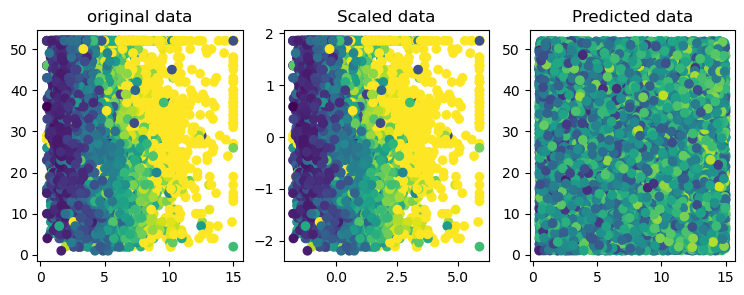

Pipeline(steps=[('scale', StandardScaler()), ('mode', LinearRegression())])

In [43]:
plot_output(
    StandardScaler(),
    LinearRegression()) 

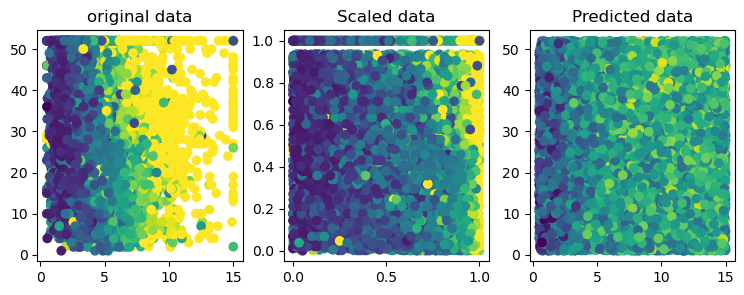

Pipeline(steps=[('scale', QuantileTransformer()), ('mode', LinearRegression())])

In [44]:
plot_output(
    QuantileTransformer(),
    LinearRegression()) 

### Polynormial Features

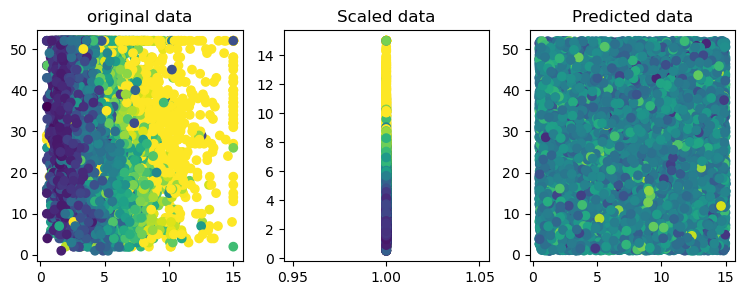

Pipeline(steps=[('scale', PolynomialFeatures()), ('mode', LinearRegression())])

In [45]:
from sklearn.preprocessing import PolynomialFeatures

plot_output(
    PolynomialFeatures(),
    LinearRegression()) 

### Onehot encoding

In [46]:
from sklearn.preprocessing import OneHotEncoder

# use handle_unknown = 'ignore' otherwise error when unknown. 
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')

arr = np.array(["low", "high", "medium"]).reshape(-1,1)
print(enc.fit_transform(arr))
print("set unknown to zero")
print(enc.transform([["zero"]]))

[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
set unknown to zero
[[0. 0. 0.]]


/Users/q1460293/opt/anaconda3/envs/ds/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Metrics

### Class Weights

In [47]:
import pandas as pd 
import numpy as np 

# data source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv

data = pd.read_csv("./datasets/large_data/creditcard.csv",
                   nrows=70000)
X = data.drop(['Time', 'Amount', 'Class'], axis=1).values
y = data['Class'].values

print(y.shape, y.sum()) # imbalaned labels

(70000,) 175


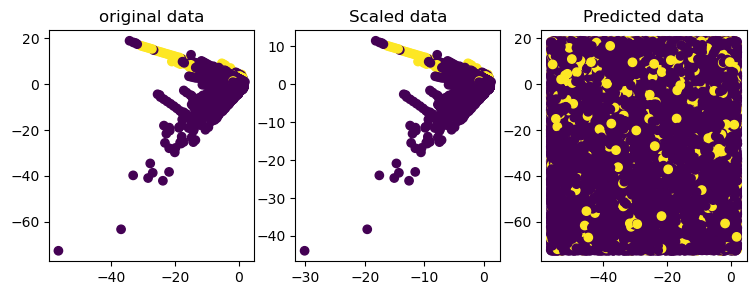

143

In [48]:
from sklearn.linear_model import LogisticRegression
model = plot_output(
    StandardScaler(), 
    LogisticRegression(max_iter=1000)
)
# number of predicted positive cases
model.predict(X).sum()

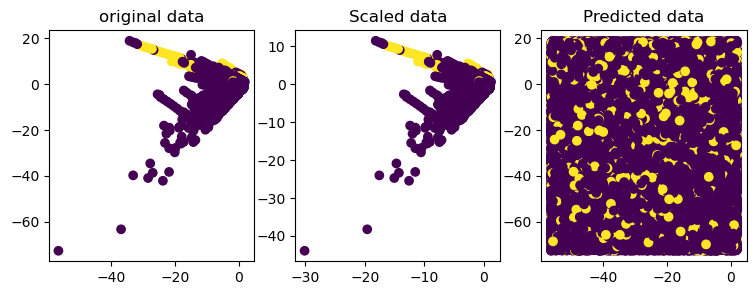

173

In [49]:
model = plot_output(
    StandardScaler(),
    LogisticRegression(
        class_weight={0:1, 1:5},
        max_iter=1000)
)

# number of predicted positive cases
model.predict(X).sum()

### GridSearchCV and Metrics

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={
        'class_weight': [
        {0:1, 1: v} for v in range(1,4)]},
    cv=4,
    n_jobs=-1
)

grid.fit(X,y)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,2.184804,0.416336,0.006365,0.002877,"{0: 1, 1: 1}","{'class_weight': {0: 1, 1: 1}}",0.983886,0.998000,0.999200,0.997771,0.994714,0.006275,1
1,2.092219,0.340624,0.008234,0.003729,"{0: 1, 1: 2}","{'class_weight': {0: 1, 1: 2}}",0.975371,0.998000,0.999486,0.998000,0.992714,0.010031,2
2,2.189196,0.173257,0.007250,0.003245,"{0: 1, 1: 3}","{'class_weight': {0: 1, 1: 3}}",0.970629,0.998057,0.999486,0.998229,0.991600,0.012120,3


#### Custom score metrics

In [53]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y, grid.predict(X)))
print(recall_score(y, grid.predict(X)))


0.7535211267605634
0.6114285714285714


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, make_scorer

grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={
        'class_weight': [
        {0:1, 1: v} for v in np.linspace(1, 20, 10)]},
    scoring={
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score)},
    refit='precision_score', # metrics to select the best model based on
    return_train_score=True,
    cv=5,
    n_jobs=-1
)

grid.fit(X,y)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision_score,split1_test_precision_score,split2_test_precision_score,split3_test_precision_score,...,mean_test_recall_score,std_test_recall_score,rank_test_recall_score,split0_train_recall_score,split1_train_recall_score,split2_train_recall_score,split3_train_recall_score,split4_train_recall_score,mean_train_recall_score,std_train_recall_score
0,2.440421,0.234203,0.032578,0.004983,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.523810,0.700000,1.000000,0.969697,...,0.594286,0.362936,10,0.692857,0.600000,0.564286,0.542857,0.707143,0.621429,0.066853
1,2.392233,0.278666,0.036218,0.005353,"{0: 1, 1: 3.111111111111111}","{'class_weight': {0: 1, 1: 3.111111111111111}}",0.242857,0.690476,1.000000,0.970588,...,0.691429,0.278421,9,0.835714,0.771429,0.757143,0.692857,0.814286,0.774286,0.049611
2,2.233904,0.176403,0.033126,0.006119,"{0: 1, 1: 5.222222222222222}","{'class_weight': {0: 1, 1: 5.222222222222222}}",0.151786,0.659091,1.000000,0.970588,...,0.725714,0.240136,8,0.857143,0.850000,0.792857,0.742857,0.850000,0.818571,0.044401
3,2.176018,0.154308,0.032741,0.003904,"{0: 1, 1: 7.333333333333334}","{'class_weight': {0: 1, 1: 7.333333333333334}}",0.113712,0.666667,1.000000,0.971429,...,0.742857,0.243109,7,0.871429,0.857143,0.850000,0.800000,0.857143,0.847143,0.024578
4,2.165391,0.289719,0.031323,0.003480,"{0: 1, 1: 9.444444444444445}","{'class_weight': {0: 1, 1: 9.444444444444445}}",0.093664,0.666667,0.952381,0.945946,...,0.760000,0.235329,6,0.878571,0.871429,0.857143,0.814286,0.857143,0.855714,0.022315
5,2.290987,0.173844,0.030734,0.002148,"{0: 1, 1: 11.555555555555555}","{'class_weight': {0: 1, 1: 11.555555555555555}}",0.078704,0.638298,0.952381,0.945946,...,0.765714,0.226707,5,0.878571,0.871429,0.864286,0.821429,0.878571,0.862857,0.021381
6,2.058502,0.195314,0.033462,0.003148,"{0: 1, 1: 13.666666666666668}","{'class_weight': {0: 1, 1: 13.666666666666668}}",0.063433,0.625000,0.913043,0.945946,...,0.777143,0.213350,4,0.878571,0.878571,0.871429,0.828571,0.892857,0.870000,0.021853
7,2.025465,0.224843,0.028388,0.006049,"{0: 1, 1: 15.777777777777779}","{'class_weight': {0: 1, 1: 15.777777777777779}}",0.056761,0.625000,0.913043,0.945946,...,0.782857,0.204919,3,0.878571,0.878571,0.871429,0.828571,0.900000,0.871429,0.023474
8,1.898799,0.317755,0.025351,0.008259,"{0: 1, 1: 17.88888888888889}","{'class_weight': {0: 1, 1: 17.88888888888889}}",0.051672,0.625000,0.913043,0.945946,...,0.794286,0.189004,1,0.878571,0.878571,0.871429,0.835714,0.907143,0.874286,0.022857
9,1.487979,0.321548,0.018313,0.008333,"{0: 1, 1: 20.0}","{'class_weight': {0: 1, 1: 20.0}}",0.047420,0.612245,0.913043,0.945946,...,0.794286,0.189004,1,0.878571,0.878571,0.871429,0.842857,0.907143,0.875714,0.020504


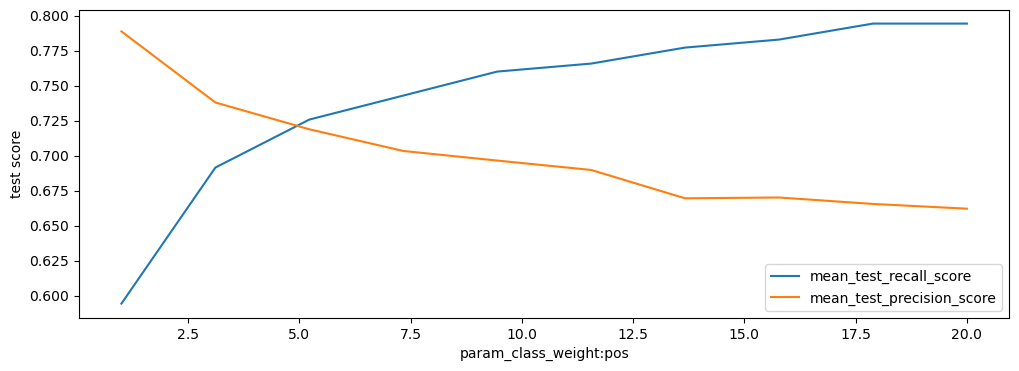

In [65]:
# test scores
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision_score']:
    plt.plot([_[1] for _ in df['param_class_weight']], 
             df[score], label=score)
plt.xlabel('param_class_weight:pos')
plt.ylabel('test score')
plt.legend()
plt.show()    


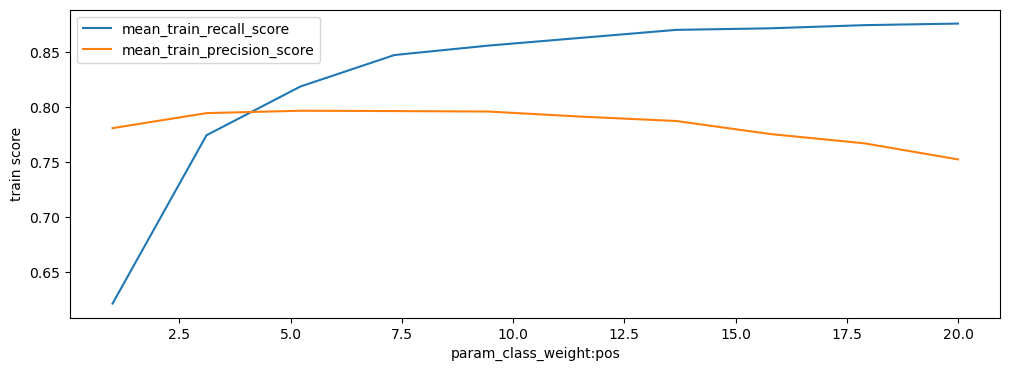

In [66]:
# train scores
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_train_recall_score', 'mean_train_precision_score']:
    plt.plot([_[1] for _ in df['param_class_weight']], 
             df[score], label=score)
plt.xlabel('param_class_weight:pos')
plt.ylabel('train score')
plt.legend()
plt.show()    


#### Custom score

In [91]:
# use the same signiture of the score metrics
# general metrics = f(y_true, y_pred) => make_scorer(f) => 
# convert to scoring signiture => s(estimator, X, y, w) 
def min_recall_precision(y_true, y_pred):
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return min(recall, precision)

def avg_recall_precision(est, X, y_true, sample_weight=None):
    y_pred = est.predict(X)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    return (recall + precision)/2


grid = GridSearchCV(
    estimator=LogisticRegression(max_iter=1000),
    param_grid={
        'class_weight': [
        {0:1, 1: v} for v in np.linspace(1, 20, 10)]},
    scoring={
        'precision_score': make_scorer(precision_score),
        'recall_score': make_scorer(recall_score, greater_is_better=True),
        'min_recall_precision': make_scorer(min_recall_precision, greater_is_better=True),
        'avg_recall_precision': avg_recall_precision},
    refit='avg_recall_precision', # metrics to select the best model based on
    return_train_score=True,
    cv=5,
    n_jobs=-1
)
# train with sample weight
# for example, weight sample by Amount 
grid.fit(X,y, sample_weight=np.log(1+data['Amount']))
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,params,split0_test_precision_score,split1_test_precision_score,split2_test_precision_score,split3_test_precision_score,...,mean_test_avg_recall_precision,std_test_avg_recall_precision,rank_test_avg_recall_precision,split0_train_avg_recall_precision,split1_train_avg_recall_precision,split2_train_avg_recall_precision,split3_train_avg_recall_precision,split4_train_avg_recall_precision,mean_train_avg_recall_precision,std_train_avg_recall_precision
0,3.233726,0.781046,0.091650,0.009348,"{0: 1, 1: 1.0}","{'class_weight': {0: 1, 1: 1.0}}",0.543860,0.684211,1.000000,0.891892,...,0.709139,0.147005,10,0.770899,0.716209,0.698377,0.644925,0.830392,0.732160,0.063492
1,2.802151,0.345536,0.108007,0.034651,"{0: 1, 1: 3.111111111111111}","{'class_weight': {0: 1, 1: 3.111111111111111}}",0.336634,0.644444,1.000000,0.916667,...,0.734390,0.118129,4,0.856451,0.742857,0.713853,0.665476,0.758903,0.747508,0.063059
2,2.873199,0.385484,0.103783,0.024296,"{0: 1, 1: 5.222222222222222}","{'class_weight': {0: 1, 1: 5.222222222222222}}",0.170000,0.652174,1.000000,0.970588,...,0.724991,0.137348,6,0.856159,0.821429,0.754458,0.716658,0.798392,0.789419,0.049144
3,3.005171,0.182614,0.123113,0.032112,"{0: 1, 1: 7.333333333333334}","{'class_weight': {0: 1, 1: 7.333333333333334}}",0.107937,0.652174,1.000000,0.942857,...,0.721725,0.141712,8,0.861221,0.841084,0.792278,0.763337,0.808318,0.813248,0.034732
4,2.666288,0.157843,0.103533,0.038551,"{0: 1, 1: 9.444444444444445}","{'class_weight': {0: 1, 1: 9.444444444444445}}",0.083538,0.638298,0.954545,0.944444,...,0.736686,0.140386,3,0.862288,0.845110,0.813889,0.775839,0.821273,0.823680,0.029463
5,2.373311,0.334247,0.095303,0.013703,"{0: 1, 1: 11.555555555555555}","{'class_weight': {0: 1, 1: 11.555555555555555}}",0.069672,0.600000,0.956522,0.945946,...,0.744357,0.145816,2,0.859325,0.829263,0.817493,0.784091,0.823225,0.822679,0.024094
6,2.368465,0.235524,0.101027,0.010428,"{0: 1, 1: 13.666666666666668}","{'class_weight': {0: 1, 1: 13.666666666666668}}",0.060823,0.576923,0.956522,0.945946,...,0.744498,0.146864,1,0.856404,0.824249,0.815054,0.786081,0.820680,0.820494,0.022439
7,2.438878,0.313360,0.092262,0.011859,"{0: 1, 1: 15.777777777777779}","{'class_weight': {0: 1, 1: 15.777777777777779}}",0.053712,0.545455,0.956522,0.921053,...,0.730283,0.146442,5,0.838636,0.814596,0.819362,0.774534,0.820588,0.813543,0.021147
8,2.386478,0.290549,0.074363,0.025296,"{0: 1, 1: 17.88888888888889}","{'class_weight': {0: 1, 1: 17.88888888888889}}",0.048295,0.491803,0.956522,0.897436,...,0.722263,0.144883,7,0.826078,0.818915,0.821273,0.766071,0.816279,0.809723,0.022063
9,1.700126,0.468218,0.051106,0.015432,"{0: 1, 1: 20.0}","{'class_weight': {0: 1, 1: 20.0}}",0.042660,0.468750,0.954545,0.897436,...,0.716339,0.145125,9,0.814286,0.796844,0.816586,0.756007,0.818514,0.800447,0.023521


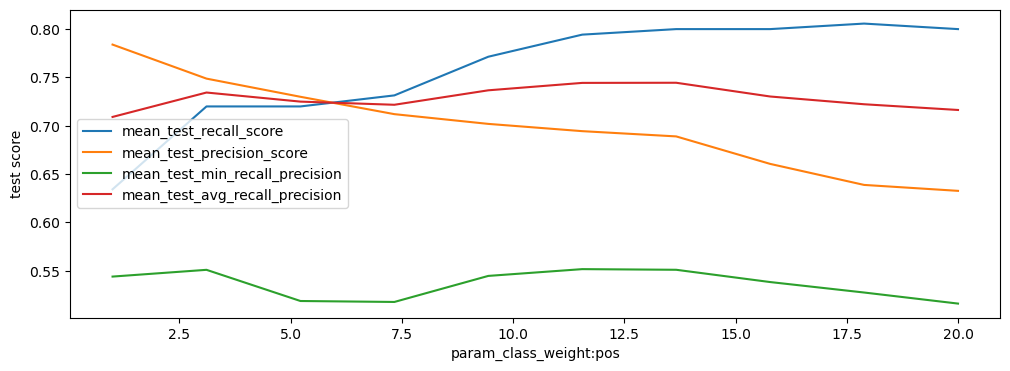

In [92]:
# cutom scores
plt.figure(figsize=(12,4))
df = pd.DataFrame(grid.cv_results_)
for score in ['mean_test_recall_score', 'mean_test_precision_score', 
              'mean_test_min_recall_precision', 'mean_test_avg_recall_precision']:
    plt.plot([_[1] for _ in df['param_class_weight']], 
             df[score], label=score)
plt.xlabel('param_class_weight:pos')
plt.ylabel('test score')
plt.legend()
plt.show()    

In [86]:
# outlier detection outliers of which outputs are not binary, instead, (-1, 1)
# this is not alinged with other metrics. Therefore need to be worked around.
# -1: outlier, 1: not outlier

from collections import Counter
from sklearn.ensemble import IsolationForest

model = IsolationForest().fit(X)
pred = model.predict(X)
print(Counter(pred))
print(Counter(np.where(pred == -1, 1, 0)))


Counter({1: 67630, -1: 2370})
Counter({0: 67630, 1: 2370})


In [90]:
from sklearn.model_selection import GridSearchCV

def outlier_precision(model, X, y):
    preds = model.predict(X) # preds => -1, 1
    # set the output 0, 1 to sync with the standard scoring output
    return precision_score(
        y, np.where(preds == -1, 1, 0))

def outlier_recall(model, X, y):
    preds = model.predict(X) # preds => -1, 1
    # set the output 0, 1 to sync with the standard scoring output
    return recall_score(
        y, np.where(preds == -1, 1, 0))

grid = GridSearchCV(
    estimator=IsolationForest(),
    param_grid = {
        'contamination': np.linspace(0.001, 0.02, 10)
    },
    # no need make_scorer() as the signature is the same. 
    scoring={
        'precision': outlier_precision, 
        'recall': outlier_recall},
    refit='precision',
    cv=5,
    n_jobs=-1
)

# while IsolationForest(X) require only X, 
# as we fit(X,y) by GridSearchCV,
# it allows us to use X, y for the custom metrics. 
grid.fit(X,y)
    

GridSearchCV(cv=5, estimator=IsolationForest(), n_jobs=-1,
             param_grid={'contamination': array([0.001     , 0.00311111, 0.00522222, 0.00733333, 0.00944444,
       0.01155556, 0.01366667, 0.01577778, 0.01788889, 0.02      ])},
             refit='precision',
             scoring={'precision': <function outlier_precision at 0x186056cb0>,
                      'recall': <function outlier_recall at 0x186056290>})

## Meta Estimator

In [94]:
def make_plots():
    X_new = np.concatenate([
        np.random.uniform(np.min(X[:, 0]), np.max(X[:, 0]), (20000, 1)),
        np.random.uniform(np.min(X[:, 1]), np.max(X[:, 1]), (20000, 1))
    ], axis=1)
    plt.figure(figsize=(16, 4))
    plt.subplot(141)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=5)
    plt.title("original data")
    plt.subplot(142)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf1.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens1")
    plt.subplot(143)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf2.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens2")
    plt.subplot(144)
    plt.scatter(X_new[:, 0], X_new[:, 1], c=clf3.predict_proba(X_new)[:, 1], s=5)
    plt.title("ens3");

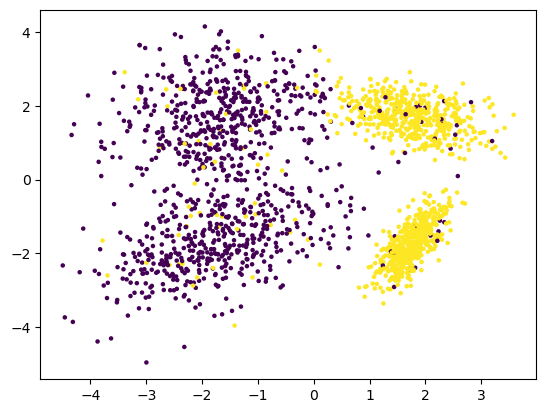

In [93]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=2000, n_features=2,
                           n_redundant=0, random_state=21,
                           class_sep=1.75, flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);



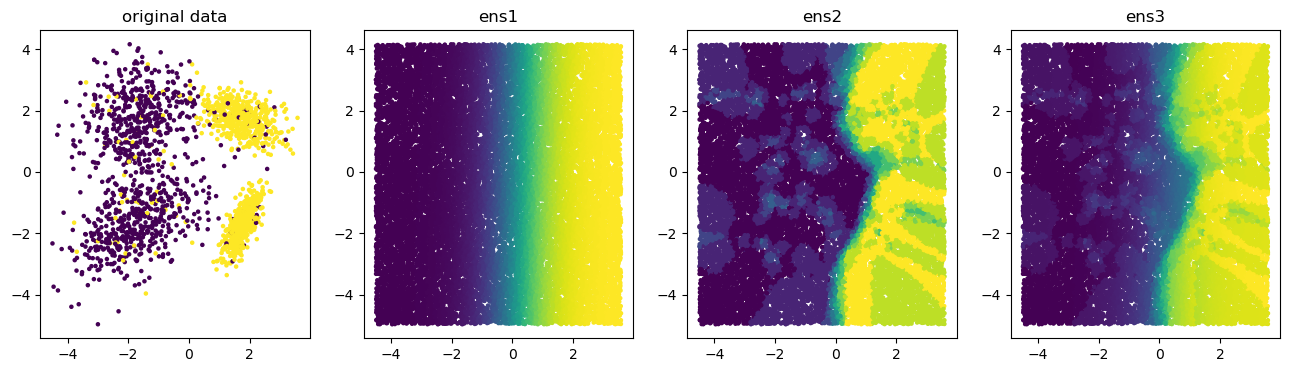

In [96]:
# Meta Estimator
# Extra steps like a post processing after model pipeplie
# Pipeline: preprocessing, featurizers -> model
# pipeline -> extra steps post processing
# Example Voting Classifier

clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                        voting='soft',
                        weights=[0.5, 0.5])
clf3.fit(X, y)

make_plots()

## Pipeline 

In [1]:
# data
import pandas as pd
import numpy as np


data = pd.read_csv('../datasets/titanic/titanic_dataset.csv')
print(data.shape)
data.head()
pd.concat([data.isna().sum(axis=0), data.dtypes], axis=1)

(418, 12)


,0,1
PassengerId,0,int64
Survived,0,int64
Pclass,0,int64
Name,0,object
Sex,0,object
Age,86,float64
SibSp,0,int64
Parch,0,int64
Ticket,0,object
Fare,1,float64


In [11]:
# preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
# pipeline
from sklearn.compose import make_column_transformer, make_column_selector, ColumnTransformer
from sklearn.pipeline import Pipeline
# Model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, make_scorer


X = data.drop('Survived', axis=1)
y = data['Survived']

num_transform_pipe = Pipeline([
    ('num_knn_impute', KNNImputer()),
    ('num_std_scale', StandardScaler())
])

text_onehot_transform_pipe = Pipeline([
    ('text_impute', SimpleImputer(strategy='most_frequent')),
    ('text_onehot', OneHotEncoder())
    ])

text_tfidf_pipe = Pipeline([
    ('text_impute', SimpleImputer(strategy='constant', fill_value='NA')),
    ('flatten', FunctionTransformer(lambda x: x.ravel(), validate=False)),  # Flatten the output
    ('text_tfidf', TfidfVectorizer())
])

feature_col_transformer = ColumnTransformer([
    ('numeric_features', num_transform_pipe, 
        make_column_selector(dtype_include=np.number)),
    ('droptext_onehot_features', text_onehot_transform_pipe, ['Sex']),
    ('text_tfidf_features', text_tfidf_pipe, ['Cabin'])
    ], remainder='drop')

model_pipeline = Pipeline([
    ('feature_pipeline', feature_col_transformer),
    ('estimator', LogisticRegression(max_iter=1000))]
)

def avg_pecision_recall(y_true, y_pred, sample_weight=None):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return (precision + recall) / 2

grid = GridSearchCV(
    estimator=model_pipeline,
    param_grid={
        'estimator__C': [0.2, 0.8, 1],
        },
    scoring={
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'avg_pr': make_scorer(avg_pecision_recall)},
    refit='avg_pr',
    cv=3,
    n_jobs=-1
)

grid.fit(X,y)
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_estimator__C,params,split0_test_precision,split1_test_precision,split2_test_precision,mean_test_precision,...,split2_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_avg_pr,split1_test_avg_pr,split2_test_avg_pr,mean_test_avg_pr,std_test_avg_pr,rank_test_avg_pr
0,0.044090,0.000918,0.029425,0.002725,0.2,{'estimator__C': 0.2},1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0,1
1,0.044350,0.001084,0.029176,0.000885,0.8,{'estimator__C': 0.8},1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0,1
2,0.044718,0.000791,0.035341,0.001374,1,{'estimator__C': 1},1.0,1.0,1.0,1.0,...,1.0,1.0,0.0,1,1.0,1.0,1.0,1.0,0.0,1


In [22]:
# access data in the pipeline
best_pipeline = grid.best_estimator_

# Accessing the feature column transformer
feature_transformer = best_pipeline.named_steps['feature_pipeline']

# Accessing individual transformers
num_transformer = feature_transformer.named_transformers_['numeric_features']
text_onehot_transformer = feature_transformer.named_transformers_['droptext_onehot_features']
text_tfidf_transformer = feature_transformer.named_transformers_['text_tfidf_features']

# Accessing individual steps within transformers
num_imputer = num_transformer.named_steps['num_knn_impute']
num_scaler = num_transformer.named_steps['num_std_scale']

text_imputer = text_onehot_transformer.named_steps['text_impute']
text_onehot_encoder = text_onehot_transformer.named_steps['text_onehot']

text_tfidf_imputer = text_tfidf_transformer.named_steps['text_impute']
text_tfidf_vectorizer = text_tfidf_transformer.named_steps['text_tfidf']